<a href="https://colab.research.google.com/github/bakarekamaldeen/traffic_sign_project/blob/main/Traffic_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
import os

# Mount Google Drive to access datasets
drive.mount('/content/drive')

# Change to your dataset directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/Traffic dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_height, img_width = 64, 64

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 704 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


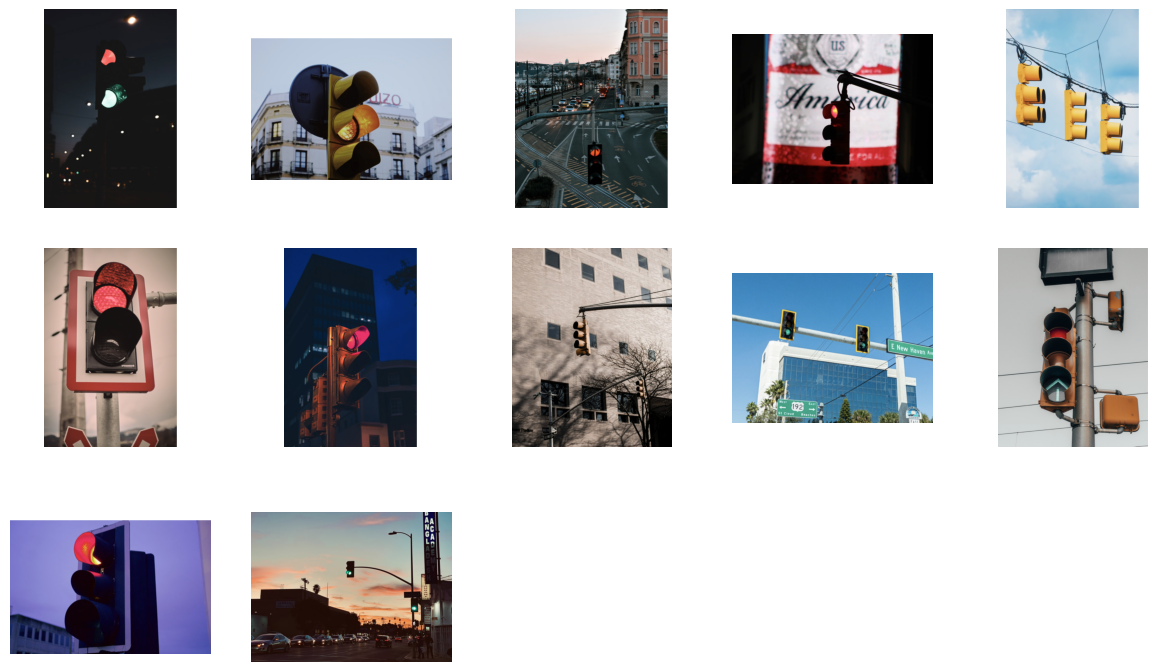

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
from PIL import Image

# Define a list of image paths
image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road0.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road1.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road2.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road3.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road4.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road5.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road6.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road7.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road8.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road9.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road10.png',
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images/road11.png',
    # Add more paths as needed
]

# Plot images
plt.figure(figsize=(15, 15))
for i, path in enumerate(image_paths):
    img = Image.open(path)
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation='softmax')  # Assuming 43 classes of traffic signs
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,747 (2.63 MB)

 Trainable params: 688,747 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Image dimensions
img_height, img_width = 64, 64

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Make sure the directory path is correct and contains 43 subdirectories for classes
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset',  # Verify this path
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset',  # Verify this path
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Check the number of classes reported by the generator
num_classes = train_generator.num_classes
print("Number of classes found:", num_classes)

# Adjust the final layer of your model if necessary
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(), # Flatten the output for classification
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Use the correct number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Use categorical_crossentropy for classification
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)
# Get true labels and predictions from the validation generator
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1) # Convert predictions to class labels

# Check if there are any classes to calculate metrics for
if num_classes > 1:
    # Compute Precision, Recall, F1-Score
    precision = precision_score(y_true, y_pred, average=None,zero_division=0) * 100
    recall = recall_score(y_true, y_pred, average=None,zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, average=None,zero_division=0) * 100
    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred) * 100
    print(f"Overall Accuracy: {accuracy:.2f}%")

    # Print metrics for each class
    for i, class_name in enumerate(validation_generator.class_indices): # Use validation_generator
        print(f"Class {class_name}: Precision = {precision[i]:.2f}%, Recall = {recall[i]:.2f}%, F1-Score = {f1[i]:.2f}%")
        Break
else:
    print("Warning: Only one class detected. Cannot calculate precision, recall, and F1-score.")

Found 704 images belonging to 2 classes.
Found 175 images belonging to 2 classes.
Number of classes found: 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 783ms/step - accuracy: 0.8426 - loss: 0.1910 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 774ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 725ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 691ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 71

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 630ms/step
Overall Accuracy: 100.00%
Class annotations: Precision = 100.00%, Recall = 100.00%, F1-Score = 100.00%


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Directory containing images
image_dir = '/content/drive/MyDrive/Colab Notebooks/Traffic dataset/images'

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image file extensions
        img_path = os.path.join(image_dir, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Make the prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)
        print(f"Image: {filename}, Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Image: road100.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: road11.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: road112.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: road127.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: road114.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: road123.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: road120.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: road122.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Image: road106.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: road126.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: road105.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: road111.png, Predicted class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: road12

Found 704 images belonging to 2 classes.
Found 175 images belonging to 2 classes.
Number of classes found: 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 992ms/step - accuracy: 0.9645 - loss: 0.1316 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 705ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 659ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 705ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0

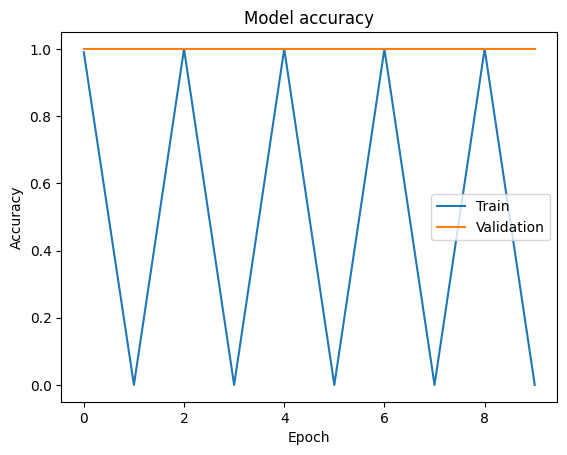

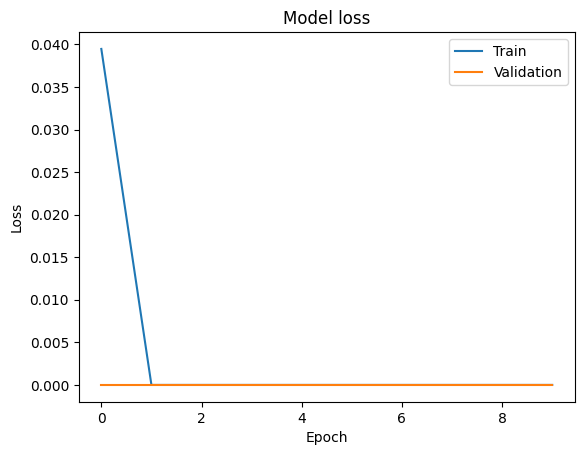

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 707ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Loss: 0.0000
Validation Accuracy: 100.00%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Image dimensions
img_height, img_width = 64, 64

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Make sure the directory path is correct and contains 43 subdirectories for classes
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset',  # Verify this path
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Traffic dataset',  # Verify this path
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Check the number of classes reported by the generator
num_classes = train_generator.num_classes
print("Number of classes found:", num_classes)

# Adjust the final layer of your model if necessary
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(), # Flatten the output for classification
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Use the correct number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Use categorical_crossentropy for classification
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Get

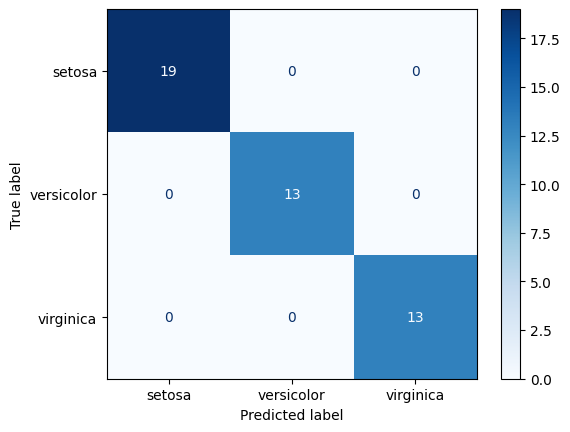

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load a sample dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
